<a href="https://colab.research.google.com/github/59822/Discrete-Distribution/blob/main/analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Número de filas
num_rows = 2000

# Generar datos aleatorios para cada columna
orders_per_hour = np.random.randint(1, 50, num_rows)
days_of_week = np.random.choice(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], num_rows)
peak_hours = np.random.choice([0, 1], num_rows, p=[0.8, 0.2])
time_between_orders = np.random.exponential(scale=5, size=num_rows)
employees_present = np.random.randint(2, 10, num_rows)

# Crear un DataFrame de pandas
data = {
    'Pedidos por hora': orders_per_hour,
    'Día de la semana': days_of_week,
    'Hora pico': peak_hours,
    'Tiempo entre pedidos (min)': time_between_orders,
    'Empleados presentes': employees_present
}
df = pd.DataFrame(data)

# Crear una serie de fechas y horas aleatorias
start_date = datetime(2023, 1, 1, 0, 0, 0)
end_date = start_date + timedelta(days=365)
date_times = pd.date_range(start=start_date, end=end_date, periods=num_rows)

# Añadir la columna al DataFrame
df['Fecha y hora'] = date_times

# Mostrar las primeras 5 filas del DataFrame
df.head()

,Pedidos por hora,Día de la semana,Hora pico,Tiempo entre pedidos (min),Empleados presentes,Fecha y hora
0,29,Domingo,0,0.216505,2,2023-01-01 00:00:00.000000000
1,6,Lunes,1,2.855356,4,2023-01-01 04:22:55.887943971
2,40,Miércoles,0,2.792230,4,2023-01-01 08:45:51.775887943
3,21,Lunes,0,23.646925,9,2023-01-01 13:08:47.663831915
4,33,Domingo,0,7.127791,8,2023-01-01 17:31:43.551775887


In [28]:
dias_movidos = df.groupby('Día de la semana')['Pedidos por hora'].count()
dias_movidos

,Pedidos por hora
Día de la semana,
Domingo,237
Jueves,305
Lunes,300
Martes,297
Miércoles,289
Sábado,293
Viernes,279


In [30]:
dias_movidos = df.groupby('Día de la semana')['Pedidos por hora'].sum().sort_values(ascending=False)
dias_movidos

,Pedidos por hora
Día de la semana,
Jueves,8022
Martes,7899
Lunes,7522
Miércoles,7306
Viernes,7006
Sábado,6910
Domingo,6387


In [31]:
#Contar cuantos pedidos hay en horas picos
pico = df.groupby('Hora pico')['Pedidos por hora'].sum().sort_values(ascending=False)
pico

,Pedidos por hora
Hora pico,
0,40310
1,10742


In [35]:
df['Hora'] = df['Fecha y hora'].dt.hour
hori = df.groupby('Hora')['Pedidos por hora'].sum().sort_values(ascending=False)
print(len(hori))

24


# Analisis de la llegada de pedidos

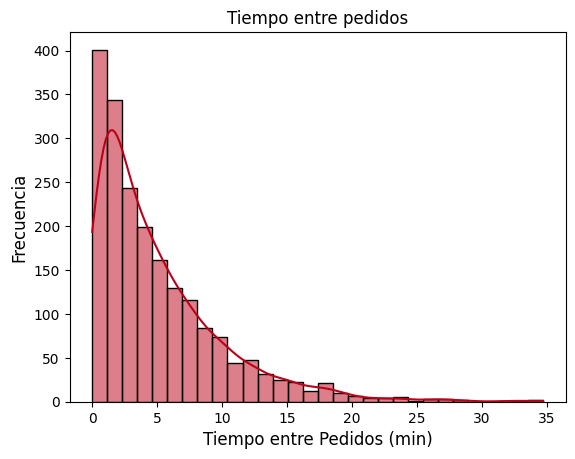

In [3]:
# Analisis Exploratorio:

## 1. Histograma tiempo entre clientes

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data =df, x = 'Tiempo entre pedidos (min)', bins =30, kde = True, color = '#bd0017')
plt.title("Tiempo entre pedidos")
plt.xlabel("Tiempo entre Pedidos (min)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
#plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar el histograma
plt.show()

Distribuciones n


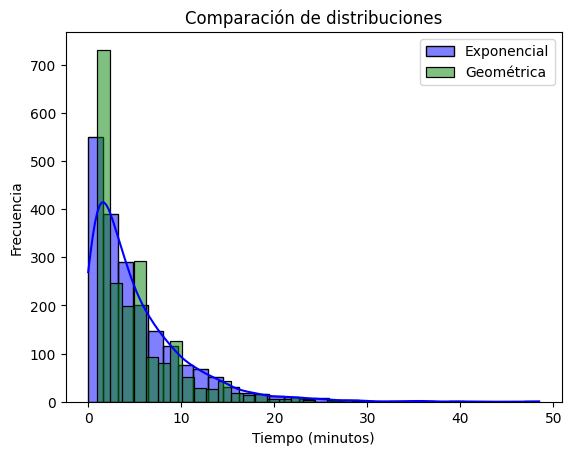

In [8]:
# Distribución exponencial:
# Cantidad que transcurre hasta que sueda el evento

import numpy as np

prom_espera_hist = df['Tiempo entre pedidos (min)'].mean() #Media
lambde = 1/prom_espera_hist # Tasa de ocurrencia


valores_hist = np.random.exponential(scale = 1/lambde, size = len(df))
# Se genera numeros random del tamaño del DataFrame con distribución normal, size es la esperanza, con el promedio


# Distribucion geometrica: Numero de ensayos hasta que llegue el primer cliente

k = 1
p_geo = lambde / k
val_geo = np.random.geometric(p=p_geo, size=len(df))

#
#sns.histplot(data=df, x='Tiempo entre pedidos (min)', bins=30, kde=True, color='#bd0017', label='Datos originales')

# Distribución exponencial
sns.histplot(valores_hist, bins=30, kde=True, color='blue', label='Exponencial', alpha=0.5)

# Distribución geométrica
sns.histplot(val_geo, bins=30, kde=False, color='green', label='Geométrica', alpha=0.5) # kde=False para geométrica (discreta)

plt.title("Comparación de distribuciones")
plt.xlabel("Tiempo (minutos)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

En esto, podemos analizar con los datos reales como se está comportando mediante el histograma, y en cuales intervalos hay más llegadas. Con la función exponencial evaluamos variables **continuas**, y nos permite hacer un proceso de machine learning de la probabilidad que los pedidos a futuro sean así


In [10]:
# Hallar la media de los tiempos
print(f"Se espera que el tiempo entre pedidos {prom_espera_hist:.2f} minutos")

Se espera que el tiempo entre pedidos 5.02 minutos


In [15]:
# Variabilidad entre el tiempo de los cleintes
varianza = prom_espera_hist**2
print(f"La variabilidad que pueden tener los pedidos es de {varianza:.2f} minutos, de acuerdo a una distribución exponencial.\nEs decir que algunos clientes llegan de forma diferente, algunos más rápido y otros más lento")

varianz1a = np.var(df['Tiempo entre pedidos (min)'])
print(f"La varianza de los datos recolectados es de {varianz1a:.2f}")



La variabilidad que pueden tener los pedidos es de 25.25 minutos, de acuerdo a una distribución exponencial.
Es decir que algunos clientes llegan de forma diferente, algunos más rápido y otros más lento
La varianza de los datos recolectados es de 23.85


In [18]:
# Probabilidad de que el 90% de los pedidos lleguen en cierto momento

from scipy.stats import expon
percentil = 0.9
media = 1/lambde
x_90 = expon.ppf(percentil, scale=media)


print(f"El 90% de pedidos llegan entre menos de {x_90:.2f} minutos")

El 90% de pedidos llegan entre menos de 11.57 minutos


# Analisis de optimización del restaurante

In [22]:
# Numero de empleados que se requieren
'''TODO: Suponiendo que los empleados son en un promedio, NO SE AJUSTA A LA DEMANDA REAL ok '''

# Vamos a suponer que la capacidad de atención de los empleados es n= 15, o sea puede atender 15 clientes por hora
'''TODO: Como la tasa de llegada es exponencial y seguramente la de atención tambien
se deebe realizar la teoría de colas'''
n= 15
empleados_necesitados = lambde / 4
print(f"Se requieren {empleados_necesitados:.2f} empleados")



Se requieren 0.05 empleados


In [23]:
print(lambde)

0.19901064550028802


In [ ]:
lambdi = 1 / (5/60) = 12 clientes por h